# Generate Fig1 for CMG Paper

Figure to include bulk magnetization data and sketch of structure

In [31]:
import pandas as pd 
import os
import glob
import sys
import subprocess
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from pylab import *  
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit

plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

## Get bulk CMG magnetization data

In [32]:
folder_name = 'D:/SQUID Data/Analysis/CMG Bulk'
os.chdir(folder_name)
data1 =  np.genfromtxt('A072 - CMG MH H para.dat',delimiter=',',usecols=(2,3,4,9),skip_header=31,names=None)
c_names = ['Field','Temperature','Moment','Fit' ]
df1 = pd.DataFrame(data1, columns=c_names)

df1_fit = df1[(df1['Field'] > 4000)]

x1 = df1_fit['Field'].values
y1 = df1_fit['Moment'].values
fit1 = np.polyfit(x1,y1,1)
polynomial1 = np.poly1d(fit1)
y1s = polynomial1(x1)
slope1 = fit1[0]
"""
Subtract the background slope & plot it
"""    
df1['M_bg'] = df1['Moment']-(df1['Field']*slope1)
"""
Normalize data to 1
"""
df1['M_n'] = df1['M_bg']/df1['M_bg'].max()
"""
Normalize data to Volume
"""
m_max = df1.M_bg.max()
m_min = df1.M_bg.min()
V = (130E-7)*0.034
Ms = 0.00026/V
df1['M_nv']=df1['M_bg']/V
df_bulk = df1.copy()

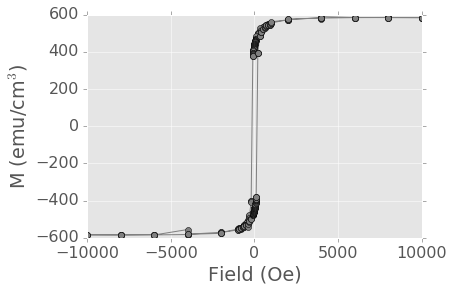

In [33]:
os.chdir('D:\Papers\Paper - PMA CMG\Fig1')
with plt.style.context('ggplot'):
    fig1 = plt.figure()
    #fig1.suptitle('CMG - A072 - Bulk Magnetisation')
    ax1 = fig1.add_subplot(111)
    ax1.plot(df_bulk.Field, df_bulk.M_nv, '-o', c='blue')
    ax1.set_xlabel('Field (Oe)')
    ax1.set_ylabel('M (emu/cm$^3$)')

## Get sample sketch


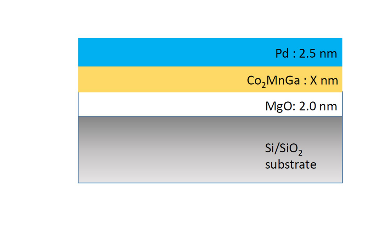

In [34]:
im = plt.imread('fig1_sketch.jpg')
implot = plt.imshow(im)
plt.axis('off')
plt.show()

## Get thin film magnetization data

In [35]:
folder_name = 'D:/SQUID Data/Analysis'
os.chdir(folder_name)
data1 =  np.genfromtxt('A064_para.csv',delimiter=',',usecols=(1,3,5),skip_header=1,names=None)
data2 =  np.genfromtxt('A064_perp.csv',delimiter=',',usecols=(1,3,5),skip_header=1,names=None)
data3 =  np.genfromtxt('A065_para.csv',delimiter=',',usecols=(1,3,5),skip_header=1,names=None)
data4 =  np.genfromtxt('A065_perp.csv',delimiter=',',usecols=(1,3,5),skip_header=1,names=None)
data5 =  np.genfromtxt('A074_para.csv',delimiter=',',usecols=(1,3,5),skip_header=1,names=None)
data6 =  np.genfromtxt('A074_perp.csv',delimiter=',',usecols=(1,3,5),skip_header=1,names=None)
data7 =  np.genfromtxt('A075_para.csv',delimiter=',',usecols=(1,3,5),skip_header=1,names=None)
data8 =  np.genfromtxt('A075_perp.csv',delimiter=',',usecols=(1,3,5),skip_header=1,names=None)

c_names = ['Field','Fit','M_n']

df1 = pd.DataFrame(data1, columns=c_names)
df2 = pd.DataFrame(data2, columns=c_names)
df3 = pd.DataFrame(data3, columns=c_names)
df4 = pd.DataFrame(data4, columns=c_names)
df5 = pd.DataFrame(data5, columns=c_names)
df6 = pd.DataFrame(data6, columns=c_names)
df7 = pd.DataFrame(data7, columns=c_names)
df8 = pd.DataFrame(data8, columns=c_names)


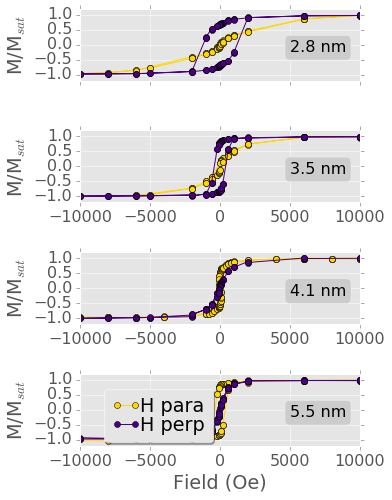

In [36]:
fig1, ax = plt.subplots(nrows=4, ncols=1,figsize=(5,7))   
fig1.tight_layout()    

ax[0].plot(df1['Field'], df1['M_n'],'-o', c='gold', label='cycle 1')
ax[0].plot(df2['Field'], df2['M_n'],'-o', c='indigo', label='cycle 1')
ax[1].plot(df3['Field'], df3['M_n'],'-o', c='gold', label='cycle 1')
ax[1].plot(df4['Field'], df4['M_n'],'-o', c='indigo', label='cycle 1')
ax[2].plot(df5['Field'], df5['M_n'],'-o', c='gold', label='cycle 1')
ax[2].plot(df6['Field'], df6['M_n'],'-o', c='indigo', label='cycle 1')
ax[3].plot(df7['Field'], df7['M_n'],'-o', c='gold', label='cycle 1')
ax[3].plot(df8['Field'], df8['M_n'],'-o', c='indigo', label='cycle 1')

ax[3].set_xlabel('Field (Oe)')
ax[0].xaxis.set_ticklabels([])

for i in range(4):
    ax[i].set_xlim([-10000,10000])
    ax[i].set_ylim([-1.2,1.2])
    ax[i].set_ylabel('M/M$_{sat}$')

labels = ['H para', 'H perp']
plt.legend(labels, ncol=1, loc='upper left', 
       bbox_to_anchor=[0.05, 0.92], 
       columnspacing=1.0, labelspacing=0.0,
       handletextpad=0.0, handlelength=1.5,
       fancybox=True, shadow=True)

ax[0].annotate('2.8 nm', xy=(5000, -0.25), xycoords='data',
            xytext=(0, 0), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            )    
ax[1].annotate('3.5 nm', xy=(5000, -0.25), xycoords='data',
            xytext=(0, 0), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            )
ax[2].annotate('4.1 nm', xy=(5000, -0.25), xycoords='data',
            xytext=(0, 0), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            )    
ax[3].annotate('5.5 nm', xy=(5000, -0.25), xycoords='data',
            xytext=(0, 0), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            )

## Get the MAE data

[-0.19389298  0.8619565 ]


(2, 6)

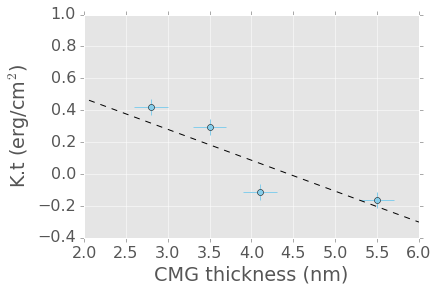

In [37]:
x = [2.8,3.5,4.1,5.5]
k1 = [1218804.146,822804.7694,-305700.6943,-252694.5278]
k2 = [1500000,840000,-270000,-300000]

data = pd.DataFrame({'Thick':x, 'K1':k1, 'K2':k2})
data['Kx1']=data.K1*data.Thick*1E-7
data['Kx2']=data.K2*data.Thick*1E-7


y1 = [0.243760829,0.205701192,-0.091710208,-0.101077811]
y2 = [0.3,0.21,-0.081,-0.12]

y = data['Kx1'].values
fit1 = np.polyfit(x,y,1)
polynomial1 = np.poly1d(fit1)
x1s = np.linspace(0,6)
y1s = polynomial1(x1s)

print(fit1)

fig1 = plt.figure()
#    fig1.suptitle("CMG anisotropy energy")

ax1 = fig1.add_subplot(111)

#ax1.errorbar(data.Thick, data.Kx1, c='orange', yerr = 0.05,xerr = 0.2, ls='none', marker = 'o',capsize=0)
ax1.errorbar(data.Thick, data.Kx2, c='skyblue', yerr = 0.05,xerr = 0.2, ls='none', marker = 'o',capsize=0)
ax1.plot(x1s,y1s,ls='dashed',c='black')
ax1.set_xlabel('CMG thickness (nm)')
ax1.set_ylabel('K.t (erg/cm$^2$)')
ax1.set_xlim([2,6])

#labels = ['Integral','Crossing']


## Fit the anisotropy

# Generate the final figure

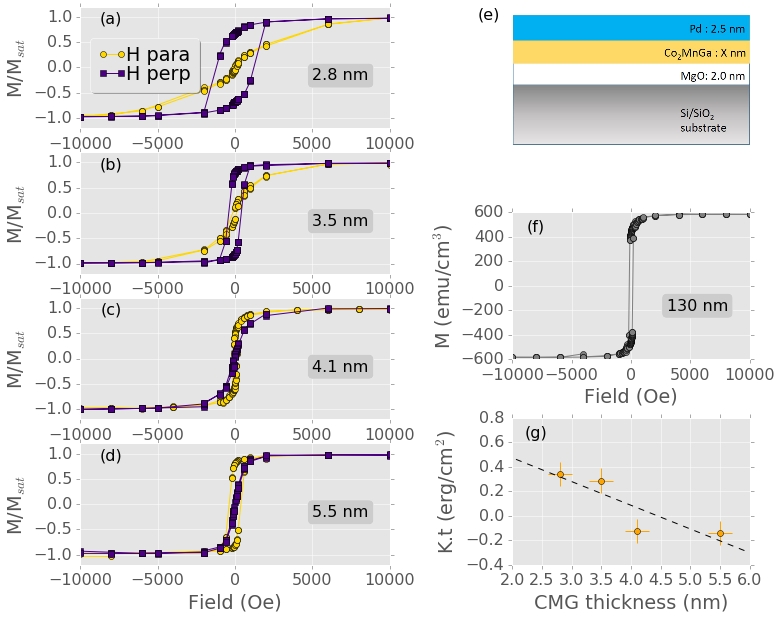

In [49]:
folder_name = 'D:/Papers/Paper - PMA CMG/Fig1'
os.chdir(folder_name)

fig1 = plt.figure(figsize=(10,10))

gs1 = gridspec.GridSpec(4, 3)
gs1.update(left=0.05, right=0.48, wspace=0.05)
ax1 = plt.subplot(gs1[0, :])
ax2 = plt.subplot(gs1[1, :])
ax3 = plt.subplot(gs1[2, :])
ax4 = plt.subplot(gs1[3, :])

gs2 = gridspec.GridSpec(3, 1)
gs2.update(left=0.65, right=0.98, hspace=0.4)
ax5 = plt.subplot(gs2[0,0])
ax6 = plt.subplot(gs2[1,0])
ax7 = plt.subplot(gs2[2, 0])

"""
Fill in left hand column
"""
ax1.plot(df1['Field'], df1['M_n'],'-o', c='gold', label='cycle 1')
ax1.plot(df2['Field'], df2['M_n'],'-s', c='indigo', label='cycle 1')
ax2.plot(df3['Field'], df3['M_n'],'-o', c='gold', label='cycle 1')
ax2.plot(df4['Field'], df4['M_n'],'-s', c='indigo', label='cycle 1')
ax3.plot(df5['Field'], df5['M_n'],'-o', c='gold', label='cycle 1')
ax3.plot(df6['Field'], df6['M_n'],'-s', c='indigo', label='cycle 1')
ax4.plot(df7['Field'], df7['M_n'],'-o', c='gold', label='cycle 1')
ax4.plot(df8['Field'], df8['M_n'],'-s', c='indigo', label='cycle 1')

ax4.set_xlabel('Field (Oe)')
#ax1.xaxis.set_ticklabels([])
ax1.set_xlim([-10000,10000])
ax1.set_ylim([-1.2,1.2])
ax1.set_ylabel('M/M$_{sat}$')
ax2.set_xlim([-10000,10000])
ax2.set_ylim([-1.2,1.2])
ax2.set_ylabel('M/M$_{sat}$')
ax3.set_xlim([-10000,10000])
ax3.set_ylim([-1.2,1.2])
ax3.set_ylabel('M/M$_{sat}$')
ax4.set_xlim([-10000,10000])
ax4.set_ylim([-1.2,1.2])
ax4.set_ylabel('M/M$_{sat}$')

labels = ['H para', 'H perp']
ax1.legend(labels, ncol=1, loc='upper left', 
       bbox_to_anchor=[0.00, 0.82], 
       columnspacing=1.0, labelspacing=0.0,
       handletextpad=0.0, handlelength=1.5,
       fancybox=True, shadow=True)

ax1.annotate('2.8 nm', xy=(5000, -0.25), xycoords='data',
            xytext=(0, 0), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            )
ax1.annotate('(a)', xy=(.1, 0.9), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')
ax2.annotate('3.5 nm', xy=(5000, -0.25), xycoords='data',
            xytext=(0, 0), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            )
ax2.annotate('(b)', xy=(.1, 0.9), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')
ax3.annotate('4.1 nm', xy=(5000, -0.25), xycoords='data',
            xytext=(0, 0), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            )   
ax3.annotate('(c)', xy=(.1, 0.9), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')
ax4.annotate('5.5 nm', xy=(5000, -0.25), xycoords='data',
            xytext=(0, 0), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            )
ax4.annotate('(d)', xy=(.1, 0.9), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')

"""
Fill in right hand column
"""
# Panel e
im = plt.imread('fig1_sketch1.jpg')
ax5.imshow(im)
ax5.axis('off')
ax5.annotate('(e)', xy=(-0.1, 1), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')

# Panel f
ax6.plot(df_bulk.Field, df_bulk.M_nv, '-o', c='gray')
ax6.set_xlabel('Field (Oe)')
ax6.set_ylabel('M (emu/cm$^3$)')
ax6.annotate('130 nm', xy=(3000, -200), xycoords='data',
            xytext=(0, 0), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            )   
ax6.annotate('(f)', xy=(.1, 0.9), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')
# Panel g
ax7.errorbar(data.Thick, data.Kx1, c='orange', yerr = 0.1,xerr = 0.2, ls='none', marker = 'o',capsize=0)
ax7.plot(x1s,y1s,ls='dashed',c='black')
ax7.set_xlabel('CMG thickness (nm)')
ax7.set_ylabel('K.t (erg/cm$^2$)')
ax7.set_xlim([2,6])
ax7.set_ylim([-0.4,0.8])
ax7.annotate('(g)', xy=(.1, 0.9), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')


#savefig('Fig1.jpg',dpi=600,bbox_inches='tight')
#savefig('Fig1.pdf',dpi=900,bbox_inches='tight')